In [1]:
from sklearn.model_selection import train_test_split
from metrics import *
import pandas as pd

c:\Users\Vadim\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('./data/heart_disease.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,0,0,1,4,8.0,0,0,0


In [3]:
data['BMI'] = data['BMI'].apply(lambda x: 'Underweight' if x < 18.5 else 'Healthy' if x < 24.9 else 'Overweight' if x < 29.9 else 'Obese')
data['PhysicalHealth'] = data['PhysicalHealth'].apply(lambda x: 0 if x < 15 else 1)
data['MentalHealth'] = data['MentalHealth'].apply(lambda x: 0 if x < 15 else 1)

In [4]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,Underweight,1,0,0,0,1,0,0,8,0,1,1,4,5.0,1,0,1
1,0,Healthy,0,0,1,0,0,0,0,13,0,0,1,4,7.0,0,0,0
2,0,Overweight,1,0,0,1,1,0,1,10,0,1,1,2,8.0,1,0,0
3,0,Healthy,0,0,0,0,0,0,0,12,0,0,0,3,6.0,0,0,1
4,0,Healthy,0,0,0,1,0,1,0,5,0,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,Overweight,1,0,0,0,0,1,1,9,1,1,0,2,6.0,1,0,0
319791,0,Overweight,1,0,0,0,0,0,1,4,1,0,1,4,5.0,1,0,0
319792,0,Healthy,0,0,0,0,0,0,0,6,1,0,1,3,6.0,0,0,0
319793,0,Obese,0,0,0,0,0,0,0,2,1,0,0,3,12.0,0,0,0


In [5]:
# balance dataset
disease = data[data['HeartDisease'] == 1]
no_disease = data[data['HeartDisease'] == 0][:len(disease)]
balanced_data = pd.concat([disease, no_disease])

In [6]:
data = balanced_data

In [7]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from nb.naive_bayes import NaiveBayes

nb = NaiveBayes()
nb.fit(X_train, y_train)

In [9]:
pred = nb.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [10]:
from metrics import *
print(accuracy(y_test, pred))
print(precision(y_test, pred))
print(recall(y_test, pred))
print(f1(y_test, pred))

0.7431963470319635
0.7431379821958457
0.7373941847626058
0.7402549418067614


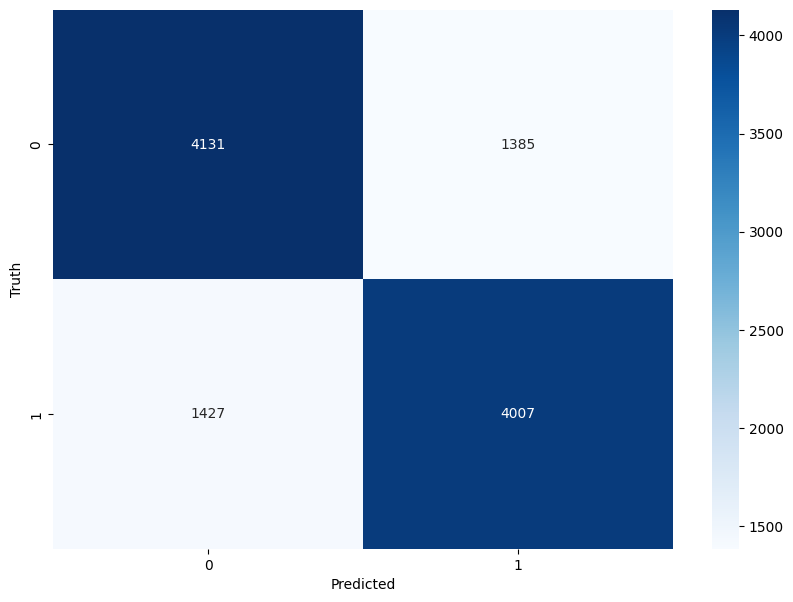

In [11]:
#import matplotlib and sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()